In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [28]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [29]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


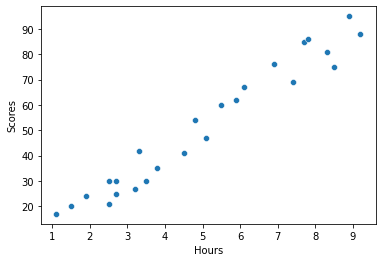

In [30]:
sns.scatterplot(data['Hours'],data['Scores'])

## data seems to be higly co-related....

In [31]:
data.corr()

#score 0.97......
#regression can be the best choice for the given data since data is highly co-related...

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [34]:
#spliting the data
x= data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [35]:
model=LinearRegression()
model.fit(x_train,y_train)
print("taining done....:)")

taining done....:)


##plotting data with best fit line

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


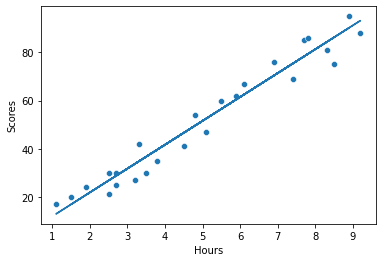

In [36]:
p=model.coef_*x +model.intercept_
sns.scatterplot(data['Hours'],data['Scores'])
plt.plot(x,p)

In [40]:
result=pd.DataFrame({'actual':y_test,'predicted':model.predict(x_test)})
result

,actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


##predicting given result of 9.25 hr

In [52]:
hours =np.array([9.25])

predicted = model.predict([hours])
print("{} hours of study \npredicted score {} ".format(hours[0],predicted[0]))

9.25 hours of study 
predicted score 93.69173248737539 


## evaluating the model...

In [56]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, result['predicted']))

Mean Absolute Error: 4.183859899002982
